In [1]:
import numpy as np
from librosa.core import stft
import Spectrogram
import matplotlib.pyplot as plt

import torch

np.random.seed(3)

fs = 22050 # sampling rate
s = np.linspace(0,10,fs*10)
x = np.sin(2*np.pi*250*s, dtype=np.float32) + np.sin(2*np.pi*500*s, dtype=np.float32) +np.sin(2*np.pi*800*s, dtype=np.float32) 

# Pytorch

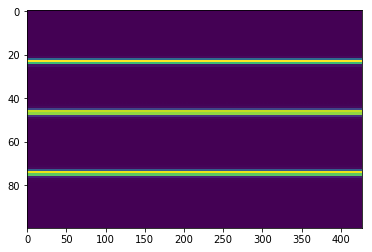

In [17]:
spec_layer = Spectrogram.Spectrogram(hop_length=512, n_fft=2048,center=False, window='hann')
spec = spec_layer(torch.tensor(x))
plt.imshow(spec[0][:100].numpy(), aspect='auto')

# Librosa

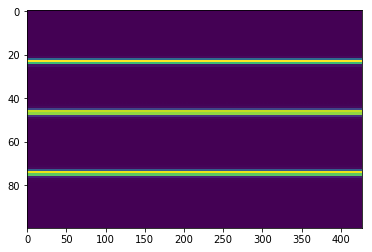

In [18]:
S_stft = np.abs(stft(x, hop_length=512, n_fft=2048,center=False, window='hann'))
plt.imshow(S_stft[:100], aspect='auto')

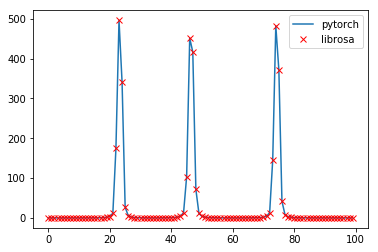

In [23]:
plt.plot(spec[0][:,0][:100].numpy())
plt.plot(S_stft[:,0][:100], 'rx')
plt.legend(['pytorch', 'librosa'])

In [20]:
np.allclose(S_stft, spec[0].numpy(),atol=1e-4)

True